In this code we calculate density-time autocorrelation.

In [4]:
import os
print(os.getcwd())

/home/saeed


In [45]:
os.chdir('/media/saeed/Expansion/ASU/results/1,6HD/wat_1.6HD_dens/fiftyfour_1.6HD/new/equilib1_nvt/10ns/20ns_npt/no_pos_rest/cont_200ns')

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_14351/786825346.py:4: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('density2.xvg', sep='\s+', header=None, names=['time','density'])


<Axes: xlabel='time'>

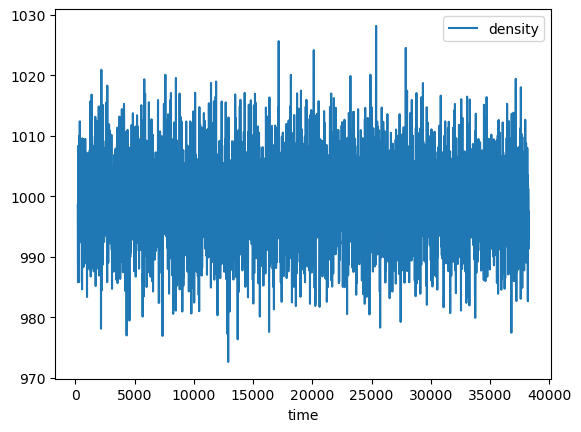

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('density2.xvg', sep='\s+', header=None, names=['time','density'])
df.plot('time')


A time correlation function (TCF) is a mathematical tool used in statistical mechanics, physics, and other disciplines to quantify how the values of a physical quantity at different times are related or correlated with each other. Essentially, it provides insight into how a system evolves over time by measuring how a property of the system "remembers" its past states.
General Definition of Time Correlation Function

For a time-dependent property A(t)A(t), the time correlation function at a time lag ττ is typically defined as:
CA(τ)=⟨A(t)A(t+τ)⟩

where:

    A(t) is the value of the property at time tt.
    A(t+τ) is the value of the property at a later time t+τ.
    ⟨⋅⟩ represents an average over all possible initial times tt, or in some cases, an ensemble average over many realizations of the system.


In [39]:
import numpy as np

def read_xvg(filename):
    data = []
    
    with open(filename, 'r') as file:
        for line in file:
            # Skip lines that start with '#' or '@' (comments or metadata)
            if line.startswith('#') or line.startswith('@'):
                continue
            
            # Split the line into values and convert to float
            values = list(map(float, line.split()))
            
            # Append the values to the data list
            data.append(values)

    # Convert the list of lists into a NumPy array
    return np.array(data)

# Example usage
filename = 'density2.xvg'
density_data = read_xvg(filename)

# Now, you can access the data as a NumPy array
print(density_data)

[[  210.         998.554688]
 [  220.         992.847473]
 [  230.         985.812866]
 ...
 [38230.         991.283325]
 [38240.         994.607849]
 [38250.         997.44696 ]]



Mean of the Density: Compute the average (mean) density over time:
⟨ρ⟩=1/N∑i=1Nρ(ti)

where N is the total number of time steps.

Autocorrelation Function Formula: The autocorrelation function at a time lag ττ is defined as:
C(τ)=1/N−τ(∑t=1N−τ[ρ(t)−⟨ρ⟩][ρ(t+τ)−⟨ρ⟩]


where τ is the lag time (i.e., how far ahead in time you are comparing the density values).

    ρ(t) is the density at time tt.
    ⟨ρ⟩ is the mean density over time.
    N−τ ensures that the summation only runs over the valid range of indices.

Normalization: Often, the autocorrelation function is normalized so that the ACF at τ=0 is 1. You can normalize by dividing by the variance of the density data:
Cnormalized(τ)=C(τ)C(0)

where C(0) is the value of the autocorrelation at zero lag (the variance):
C(0)=1N∑t=1N[ρ(t)−⟨ρ⟩]2



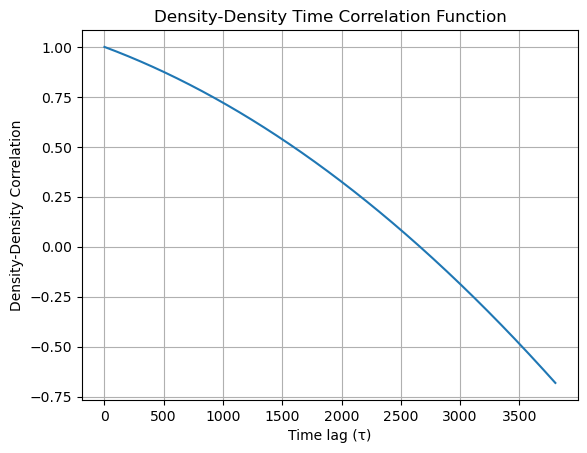

In [40]:


def density_density_tcf(density):
    N = len(density)
    mean_density = np.mean(density)
    
    # Subtract the mean from the density data
    density_fluctuations = density - mean_density

    # Initialize the time correlation function array
    tcf = np.zeros(N)

    # Calculate the time correlation function
    for tau in range(N):
        tcf[tau] = np.mean(density_fluctuations[:N-tau] * density_fluctuations[tau:])
    
    # Normalize the time correlation function by the value at tau = 0
    tcf /= tcf[0]

    return tcf

# Example usage
# Suppose you have density data at different times stored in a list or numpy array
# Replace the density_data with your actual data
#density_data = np.array([1.2, 1.5, 1.7, 1.6, 1.4, 1.8, 2.0, 1.9, 1.6, 1.5])

# Calculate the density-density time correlation function
tcf_result = density_density_tcf(density_data)

# Plot the result
plt.plot(tcf_result)
plt.xlabel('Time lag (τ)')
plt.ylabel('Density-Density Correlation')
plt.title('Density-Density Time Correlation Function')
plt.grid(True)
plt.show()

As time progresses and ττ increases, the correlation typically decays because the system starts to lose memory of its initial state:

    The further in time you go (i.e., as ττ increases), the less correlated the density values become with the original time tt.
    This decay indicates that the system’s density fluctuates and becomes less related to its past values due to random motions, interactions, or external forces.
    In many systems, this decay is exponential or follows some characteristic timescale, and it reflects how quickly the system "forgets" its initial state.

Why does the correlation go negative?

A negative correlation in the density-density correlation function means that, at certain time lags, the density at time t+τt+τ is anticorrelated with the density at time tt.

    Anticorrelation means that high density values at time tt are more likely to be followed by low density values at time t+τt+τ, and vice versa.

    This can happen due to oscillatory or periodic behavior in the system

/tmp/ipykernel_14351/4028844988.py:30: RuntimeWarning: divide by zero encountered in divide
  correlation_real /= correlation_real[0]
/tmp/ipykernel_14351/4028844988.py:30: RuntimeWarning: invalid value encountered in divide
  correlation_real /= correlation_real[0]


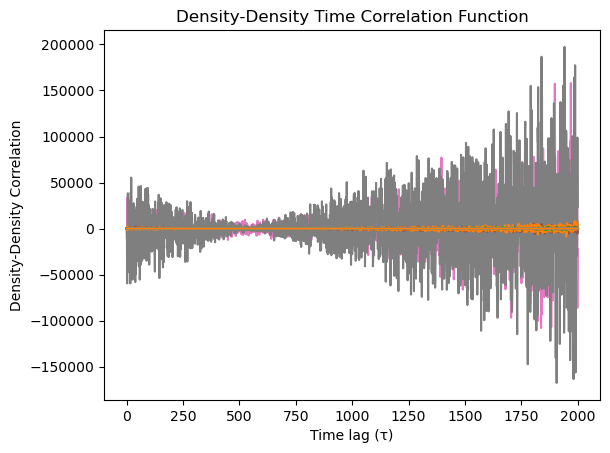

In [32]:
#calculating the Density-Density Time Correlation Function using Fast Fourier Transforms (FFT) can significantly speed up the computation, especially for large datasets. Here's a Python implementation that leverages FFT for efficient correlation computation


def density_density_correlation_fft(density_data):
    """
    Compute the Density-Density Time Correlation Function using FFT.

    Parameters:
    density_data (numpy.ndarray): Array containing density as a function of time.
    
    Returns:
    numpy.ndarray: Normalized density-density time correlation function.
    """
    # Subtract the mean to compute fluctuations around the average density
    density_fluctuations = density_data - np.mean(density_data)
    
    # Compute the Fourier transform of the fluctuations
    fft_density = np.fft.fft(density_fluctuations, n=2*len(density_fluctuations))  # Zero-padding for efficiency
    
    # Compute the power spectrum (autocorrelation in Fourier space)
    power_spectrum = fft_density * np.conjugate(fft_density)
    
    # Inverse FFT to get the autocorrelation function in real space
    correlation = np.fft.ifft(power_spectrum)
    
    # Only take the real part and the first half of the data (the rest is symmetric)
    correlation_real = np.real(correlation)[:len(density_fluctuations)]
    
    # Normalize the correlation function: C(τ=0) is the variance
    correlation_real /= correlation_real[0]
    
    return correlation_real

# Example usage with large dataset
# Replace this with your actual density data over time
#density_data = np.random.rand(100000)  # Example: Replace with actual density data

correlation_result = density_density_correlation_fft(density_data)

# Output or plot the result
import matplotlib.pyplot as plt
plt.plot(correlation_result)
plt.xlabel('Time lag (τ)')
plt.ylabel('Density-Density Correlation')
plt.title('Density-Density Time Correlation Function')
plt.show()


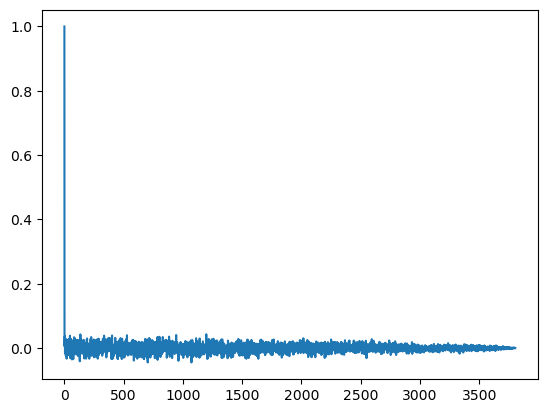

In [51]:
#Wenwei's code: time correlation function
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import cProfile
import sys

def autocorr(x):
	x = np.asarray(x)
	N = len(x)
	x = x-x.mean()
	# fft to frequency space
	s = fft.fft(x, N*2-1)
	result = np.real(fft.ifft(s * np.conjugate(s), N*2-1))
	result = result[:N]
	result /= result[0]
	return result


rg=np.loadtxt('density2.xvg')[:,1]
resy=autocorr(rg)
np.save('corr.npy',resy)
plt.plot(resy)
plt.show()

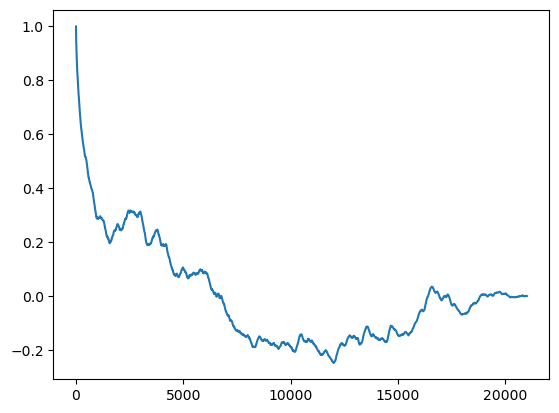

In [47]:
#Wenwei's code: time correlation function
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import cProfile
import sys

def autocorr(x):
	x = np.asarray(x)
	N = len(x)
	x = x-x.mean()
	# fft to frequency space
	s = fft.fft(x, N*2-1)
	result = np.real(fft.ifft(s * np.conjugate(s), N*2-1))
	result = result[:N]
	result /= result[0]
	return result


rg=np.loadtxt('gyrate_1.xvg')[:,1]
resy=autocorr(rg)
np.save('corr.npy',resy)
plt.plot(resy)
plt.show()

In [1]:
# Change to the data directory for desktop
%cd /media/saeed/Expansion/ASU/results/1,6HD/wat_1.6HD_dens/fiftyfour_1.6HD/antechamber/equilib_npt/3000water/decrease_eps/decrease_eps

/media/saeed/Expansion/ASU/results/1,6HD/wat_1.6HD_dens/fiftyfour_1.6HD/antechamber/equilib_npt/3000water/decrease_eps/decrease_eps


In [2]:
!echo "Density" | gmx_2024 energy -f npt.edr -o density.xvg -xvg none

                      :-) GROMACS - gmx energy, 2024.2 (-:

Executable:   /home/saeed/.local/gromacs_2024/bin/gmx_2024
Data prefix:  /home/saeed/.local/gromacs_2024
Working dir:  /media/saeed/Expansion/ASU/results/1,6HD/wat_1.6HD_dens/fiftyfour_1.6HD/antechamber/equilib_npt/3000water/decrease_eps/decrease_eps
Command line:
  gmx_2024 energy -f npt.edr -o density.xvg -xvg none

Opened npt.edr as single precision energy file

Select the terms you want from the following list by
selecting either (part of) the name or the number or a combination.
End your selection with an empty line or a zero.
-------------------------------------------------------------------
  1  Angle            2  Proper-Dih.      3  LJ-14            4  Coulomb-14    
  5  LJ-(SR)          6  Coulomb-(SR)     7  Coul.-recip.     8  Potential     
  9  Kinetic-En.     10  Total-Energy    11  Temperature     12  Pressure      
 13  Constr.-rmsd    14  Box-X           15  Box-Y           16  Box-Z         
 17  Volume   

[[0.00000000e+00 2.61168300e-03]
 [4.00000000e+01 2.73602800e-03]
 [8.00000000e+01 3.12296500e-03]
 [1.20000000e+02 3.90680300e-03]
 [1.60000000e+02 5.46285100e-03]
 [2.00000000e+02 8.75045300e-03]
 [2.40000000e+02 1.70349350e-02]
 [2.80000000e+02 5.07583920e-02]
 [3.20000000e+02 9.75557495e-01]
 [3.60000000e+02 9.88307251e-01]
 [4.00000000e+02 9.86218872e-01]
 [4.40000000e+02 9.91865356e-01]
 [4.80000000e+02 9.89746582e-01]
 [5.20000000e+02 9.93700134e-01]
 [5.60000000e+02 9.96220032e-01]
 [6.00000000e+02 9.98736755e-01]
 [6.40000000e+02 9.94079346e-01]
 [6.80000000e+02 9.99992981e-01]
 [7.20000000e+02 9.78848267e-01]
 [7.60000000e+02 9.77893372e-01]
 [8.00000000e+02 9.97204407e-01]
 [8.40000000e+02 9.90267456e-01]
 [8.80000000e+02 9.85543396e-01]
 [9.20000000e+02 9.98997742e-01]
 [9.60000000e+02 9.95688843e-01]
 [1.00000000e+03 9.98602478e-01]
 [1.04000000e+03 9.82832642e-01]
 [1.08000000e+03 9.86174683e-01]
 [1.12000000e+03 9.84208618e-01]
 [1.16000000e+03 9.87881897e-01]
 [1.200000

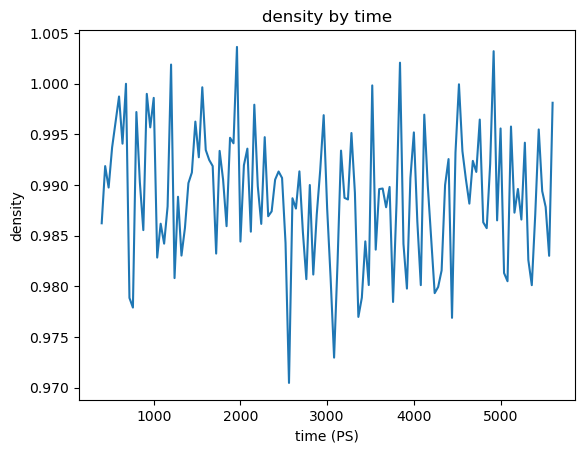

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def read_xvg(filename):
    data = []
    
    with open(filename, 'r') as file:
        for line in file:
            # Skip lines that start with '#' or '@' (comments or metadata)
            if line.startswith('#') or line.startswith('@'):
                continue
            
            # Split the line into values and convert to float
            values = list(map(float, line.split()))
            
            # Append the values to the data list
            data.append(values)

    # Convert the list of lists into a NumPy array
    return np.array(data)

# Example usage
filename = 'density.xvg'
density_data = read_xvg(filename)
#to show density in 0.999
density_data[:, 1] = density_data[:, 1] / 1000
# Now, you can access the data as a NumPy array
print(density_data)


# Plot the first column against the second column
#plt.plot(density_data[:, 0], density_data[:, 1])

# Plot from row 201 (index 200) to the end
plt.plot(density_data[10:, 0], density_data[10:, 1])

#print(density_data[10:, 0])

# Adding labels and a title
plt.xlabel('time (PS)')
plt.ylabel('density')
plt.title('density by time')

# Show the plot
plt.show()


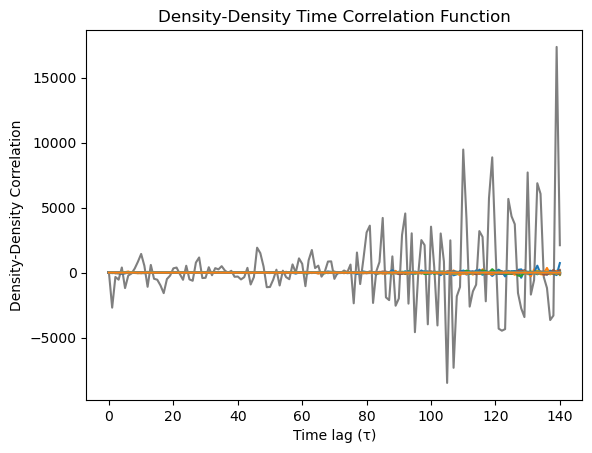

In [4]:
#autocorrelation of density

import numpy as np

def density_density_correlation_fft(density_data):
    """
    Compute the Density-Density Time Correlation Function using FFT.

    Parameters:
    density_data (numpy.ndarray): Array containing density as a function of time.
    
    Returns:
    numpy.ndarray: Normalized density-density time correlation function.
    """
    # Subtract the mean to compute fluctuations around the average density
    density_fluctuations = density_data - np.mean(density_data)
    
    # Compute the Fourier transform of the fluctuations
    fft_density = np.fft.fft(density_fluctuations, n=2*len(density_fluctuations))  # Zero-padding for efficiency
    
    # Compute the power spectrum (autocorrelation in Fourier space)
    power_spectrum = fft_density * np.conjugate(fft_density)
    
    # Inverse FFT to get the autocorrelation function in real space
    correlation = np.fft.ifft(power_spectrum)
    
    # Only take the real part and the first half of the data (the rest is symmetric)
    correlation_real = np.real(correlation)[:len(density_fluctuations)]
    
    # Normalize the correlation function: C(τ=0) is the variance
    correlation_real /= correlation_real[0]
    
    return correlation_real



correlation_result = density_density_correlation_fft(density_data)

# Output or plot the result
import matplotlib.pyplot as plt
plt.plot(correlation_result)
plt.xlabel('Time lag (τ)')
plt.ylabel('Density-Density Correlation')
plt.title('Density-Density Time Correlation Function')
plt.show()


In [5]:
# Assuming 'density_data' is a list of lists or a NumPy array
# Save the data after 100 rows

output_filename = 'density_data.txt'

# Slice the data to include rows from 200 onwards
#data_to_save = density_data[0:200]
data_to_save = density_data[0:]

with open(output_filename, 'w') as file:
    for line in data_to_save:
        file.write(' '.join(map(str, line)) + '\n')

print(f'Data from row 10 onwards saved to {output_filename}')


Data from row 10 onwards saved to density_data.txt


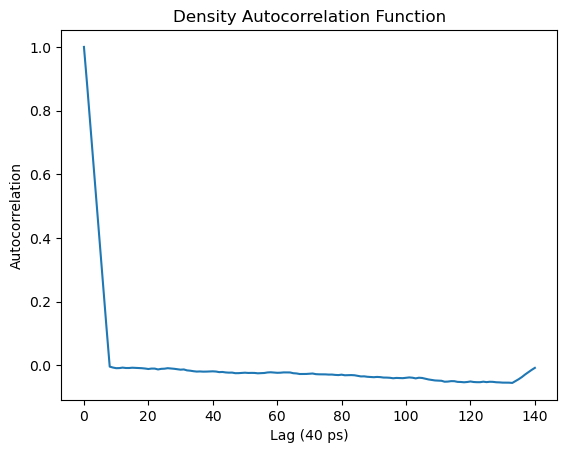

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

def autocorr(x):
    x = np.asarray(x)
    N = len(x)
    x = x - x.mean()
    
    # FFT to frequency space
    s = fft.fft(x, N * 2 - 1)
    
    # Compute the autocorrelation in frequency domain
    result = np.real(fft.ifft(s * np.conjugate(s), N * 2 - 1))
    
    # Take only the first N values, since the rest are not meaningful
    result = result[:N]
    
    # Normalize the autocorrelation by the first value (variance)
    result /= result[0]
    
    return result

# Load the second column from 'density_data.txt'
den = np.loadtxt('density_data.txt')[:, 1]
#print(rg)

# Compute the autocorrelation
resy = autocorr(den)
#print(resy)

# Save the result
np.save('corr.npy', resy)

# Plot the result
plt.plot(resy)
plt.xlabel('Lag (40 ps)')
plt.ylabel('Autocorrelation')
plt.title('Density Autocorrelation Function')
plt.show()
